## Analyze the dataset.

### 1. Load and Display data and Checking for Missing Values

In [25]:
import pandas as pd

# Load your data
df = pd.read_csv("/kaggle/input/d/mennaahmed7m/ml-dataset/loan_train.csv") 

# Preview the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Print number of rows and columns
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   540179     697401      10000        10000           9975.0   36 months   
1   585434     752191      14000        14000          13775.0   36 months   
2   457736     569298       9475         9475           9475.0   36 months   
3   734349     930860       4000         4000           4000.0   36 months   
4  1050080    1281522       3600         3600           3600.0   36 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   13.23%       338.05     C        C1  ...        11943.68        10000.00   
1    7.88%       437.94     A        A5  ...        15470.79        14000.00   
2    8.94%       301.04     A        A5  ...        10472.09         9475.00   
3    7.29%       124.04     A        A4  ...         4425.26         4000.00   
4    6.62%       110.54     A        A2  ...         2321.34         2004.17   

  total_rec_int  total_rec_late_fee recoveries col

### 2. Visualize Distributions (Histograms for numerical columns)

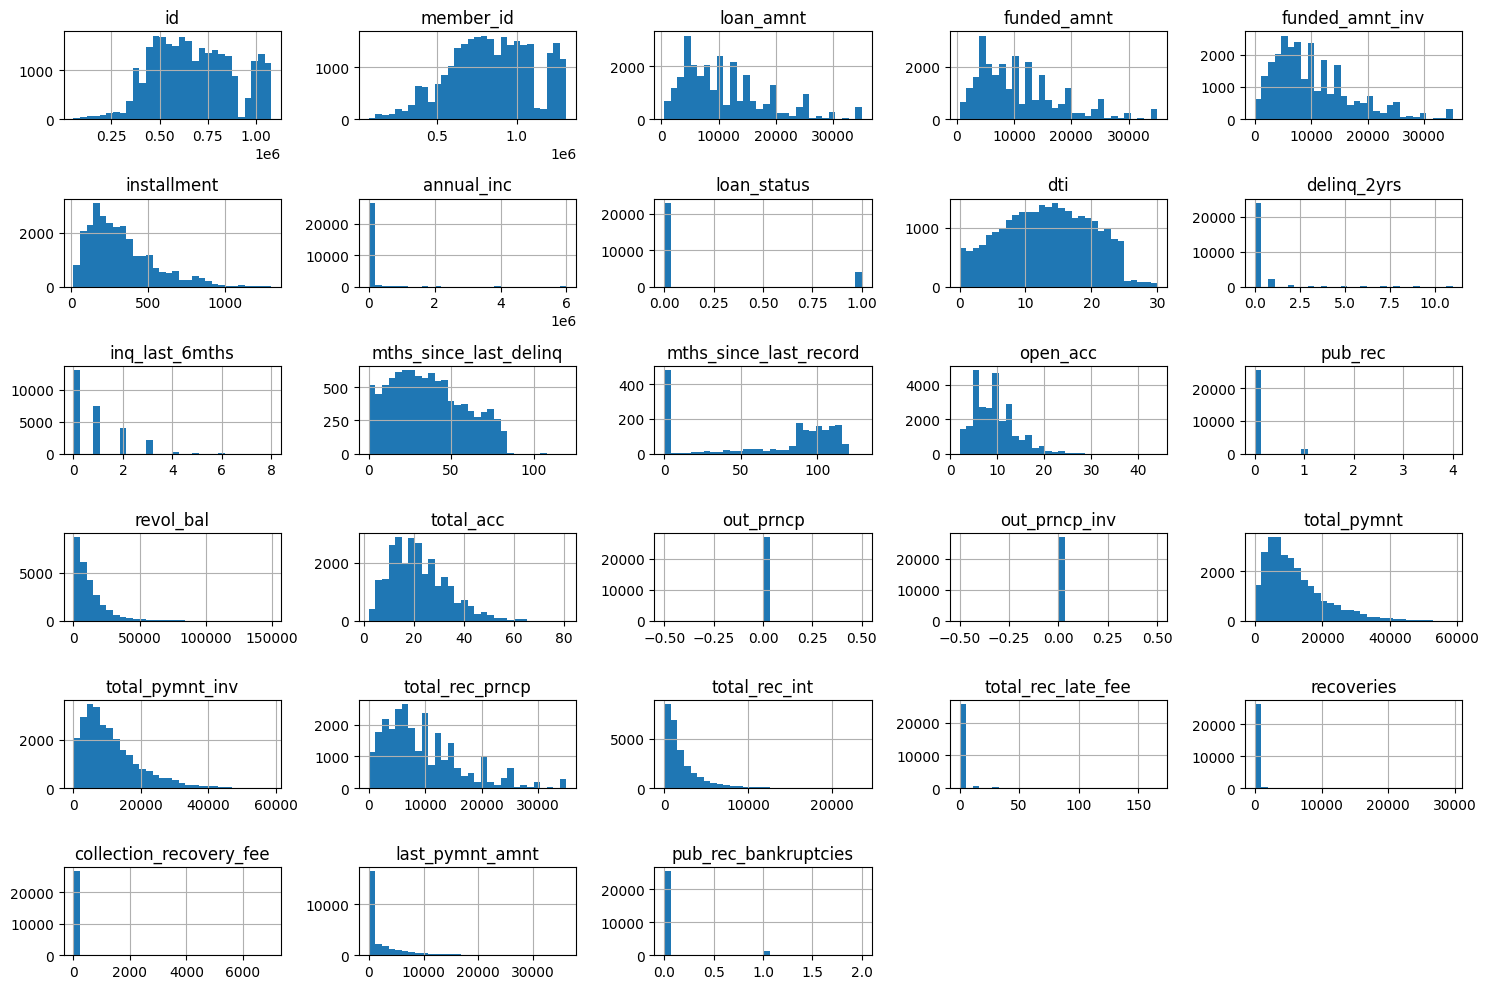

In [26]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### 3. Check Feature Correlations

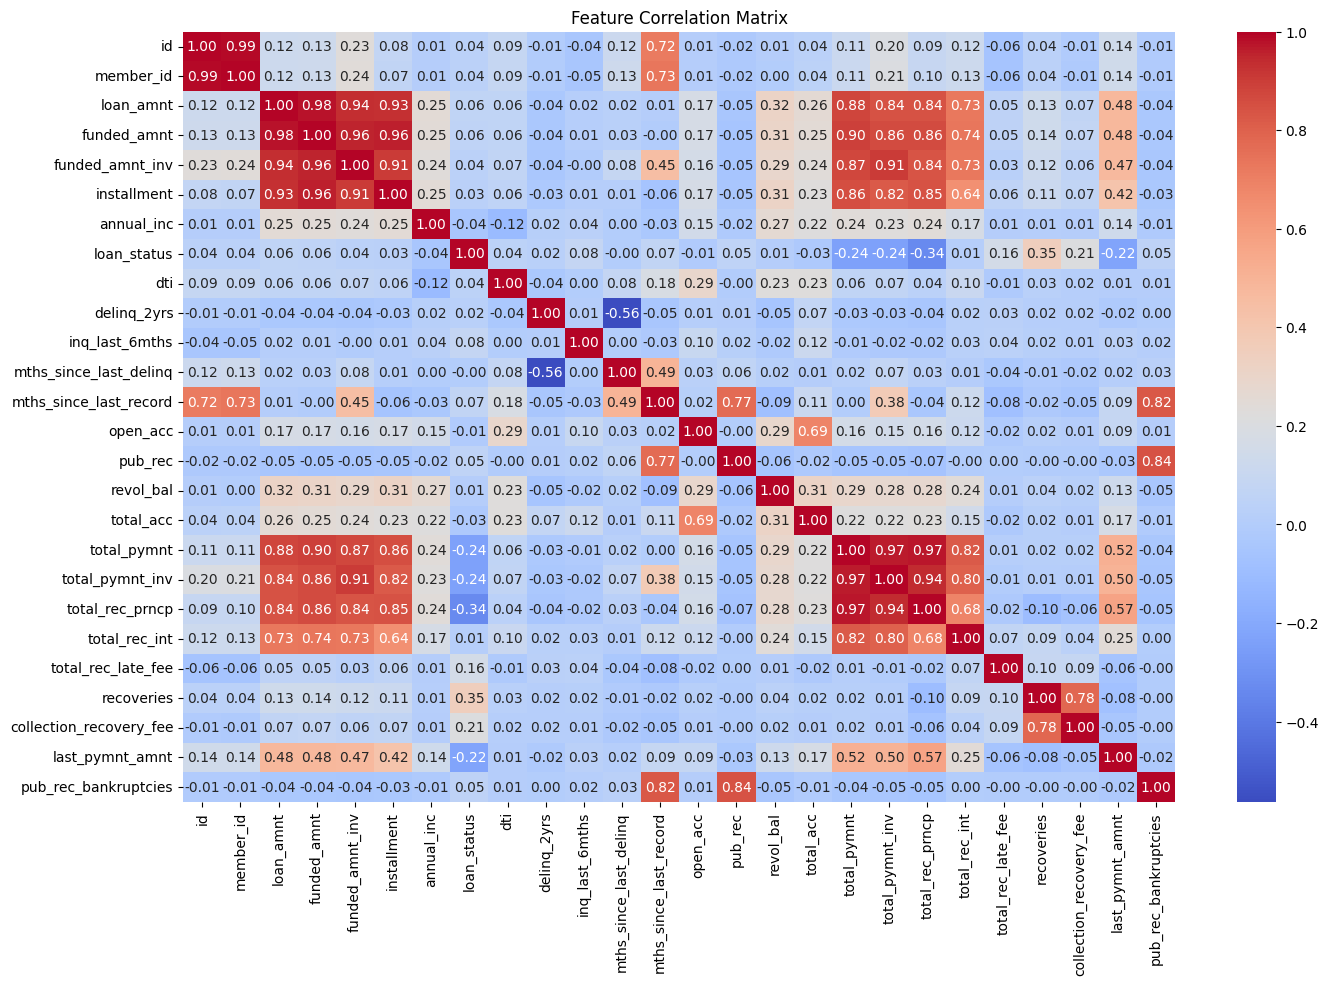

In [27]:
# Select only numeric columns for heatmap
# Columns with the same value across all rows have zero variance, which makes correlation undefined.
df = df.loc[:, df.nunique() > 1]
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

### 4. Look at Random Samples & Outliers

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
608     636935     815909      10000        10000           9975.0   
10900  1030638    1260052       7000         7000           7000.0   
316     781269     984105       5000         5000           5000.0   
21175   596491     765715       5000         5000           5000.0   
22914   794835     999498       4000         4000           4000.0   

             term int_rate  installment grade sub_grade  ... total_pymnt_inv  \
608     36 months   13.35%       338.63     C        C4  ...        11999.17   
10900   36 months    7.51%       217.78     A        A3  ...         7839.91   
316     60 months   17.19%       124.78     D        D2  ...         7483.81   
21175   60 months   13.61%       115.34     C        C2  ...          562.52   
22914   36 months    5.42%       120.64     A        A1  ...         4337.62   

      total_rec_prncp total_rec_int  total_rec_late_fee recoveries  \
608          10000.00       

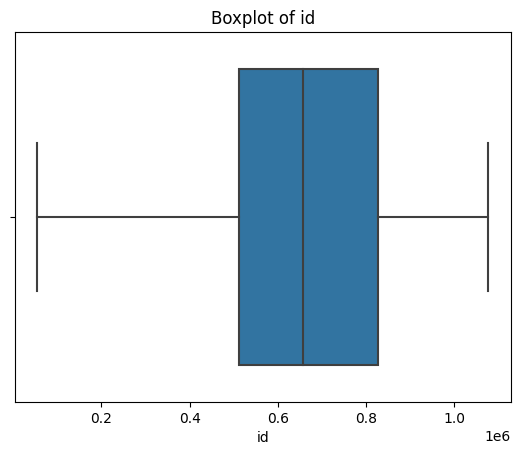

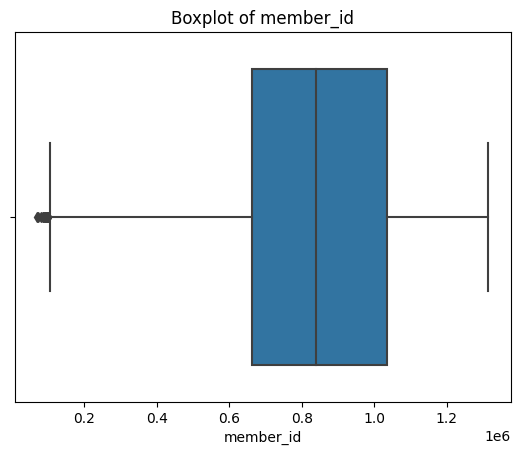

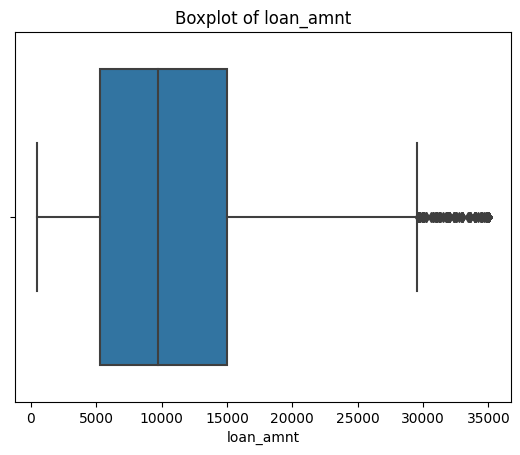

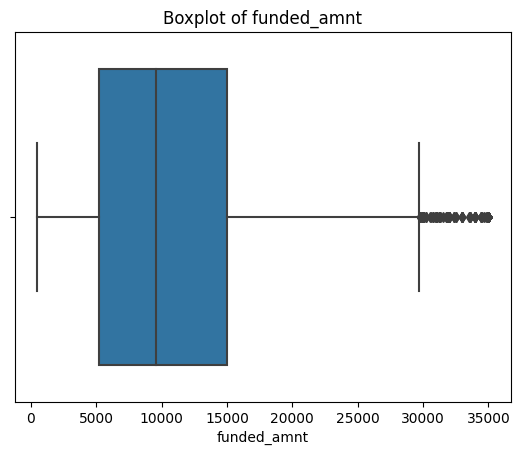

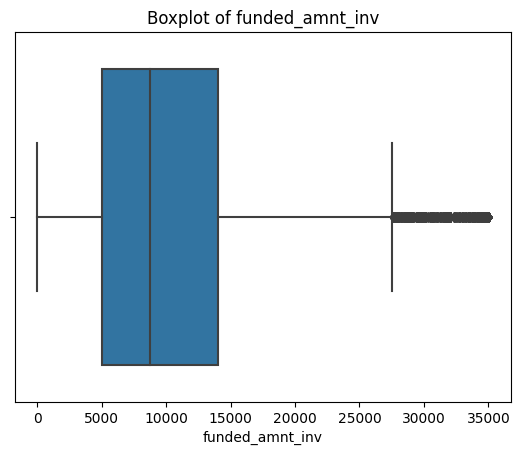

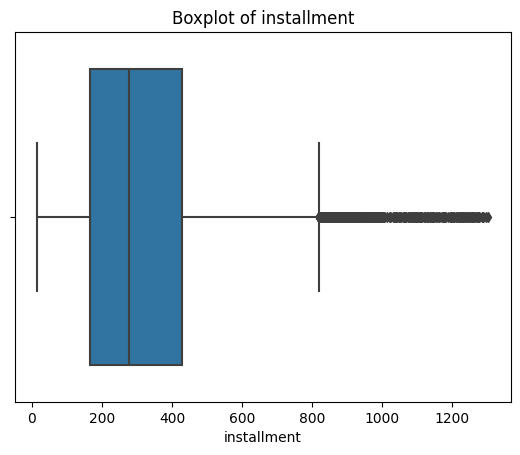

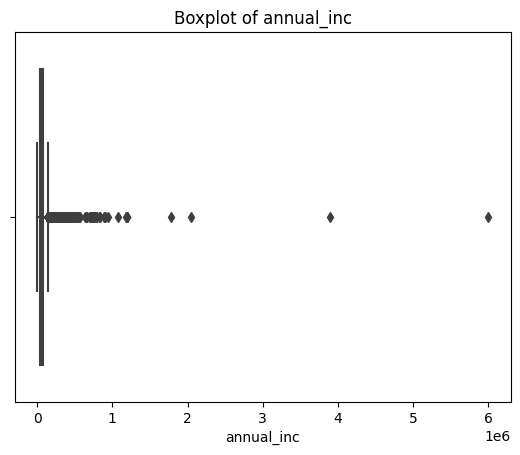

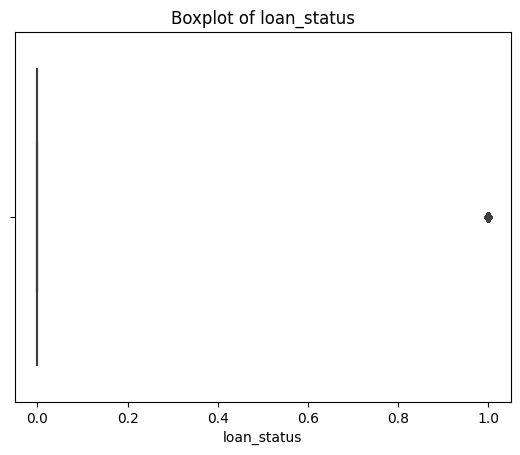

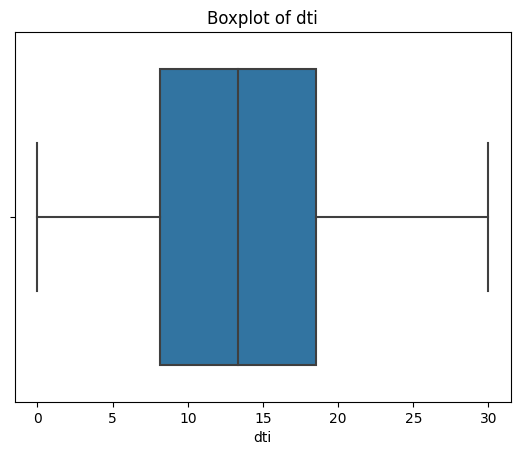

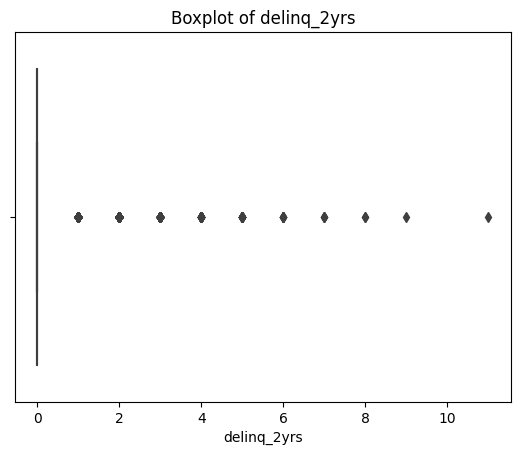

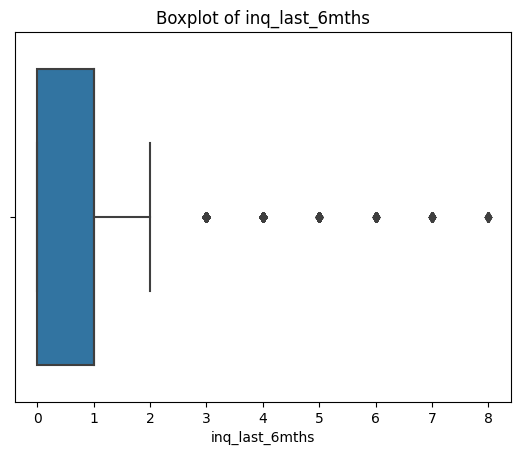

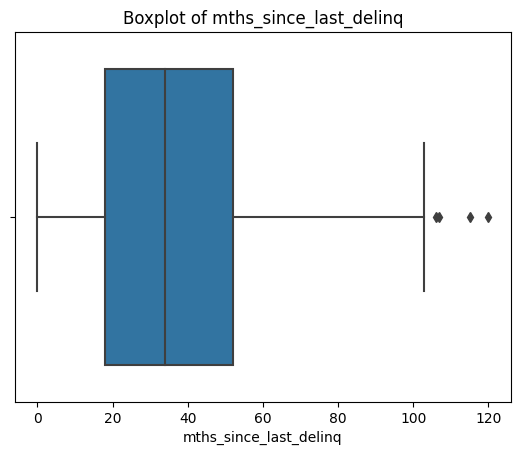

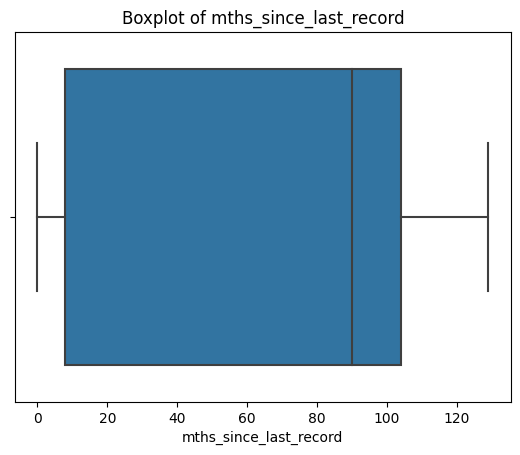

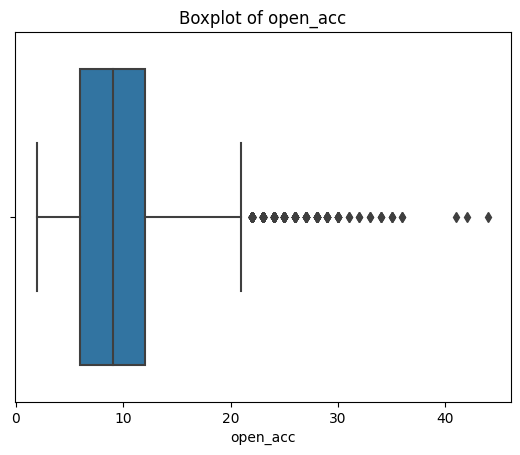

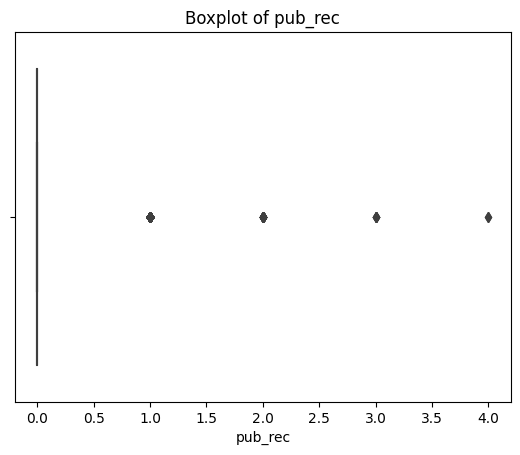

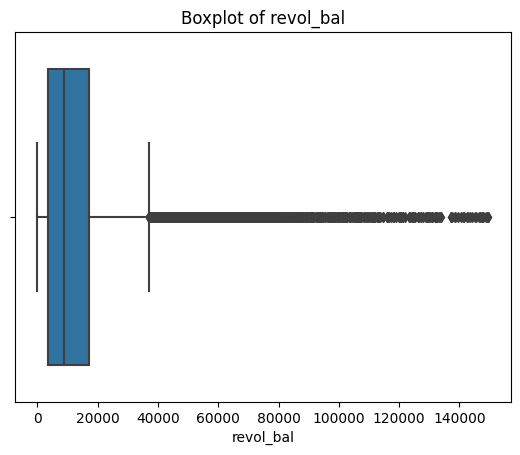

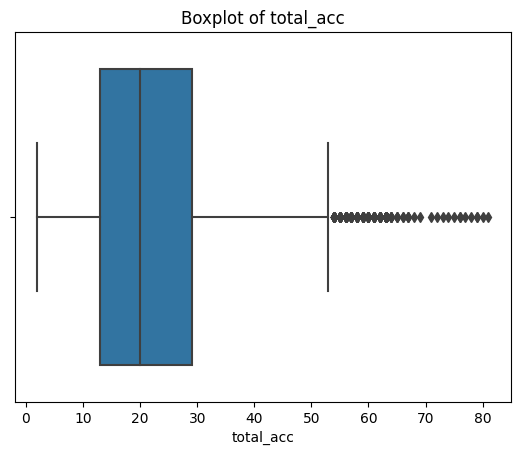

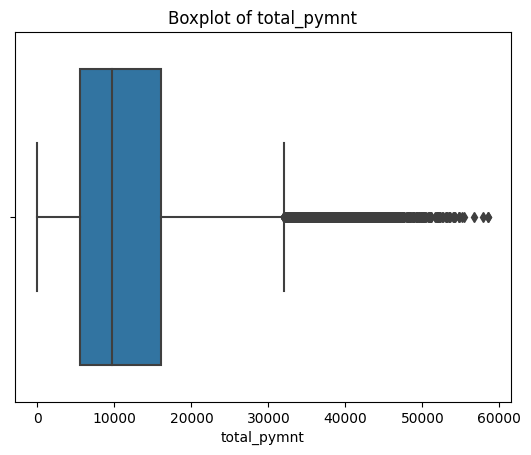

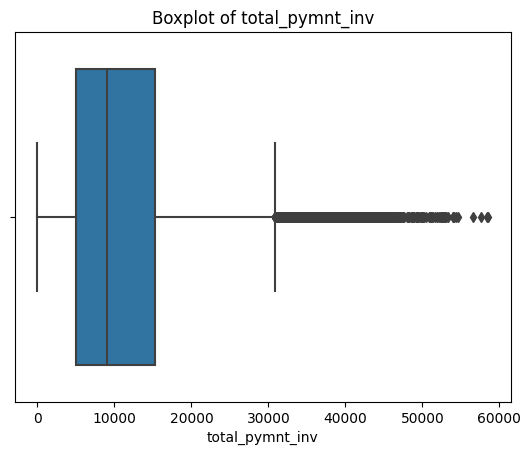

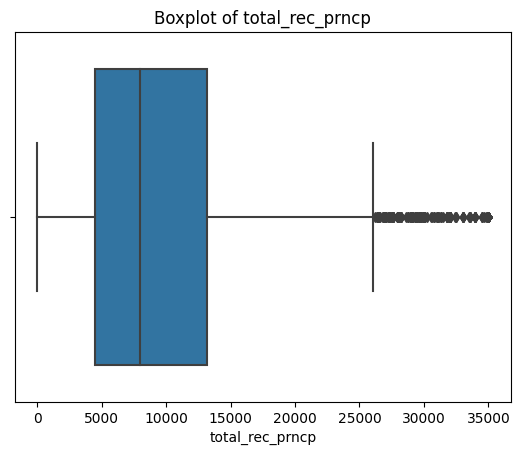

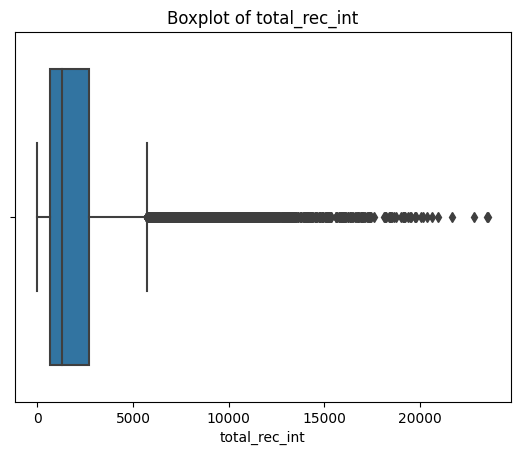

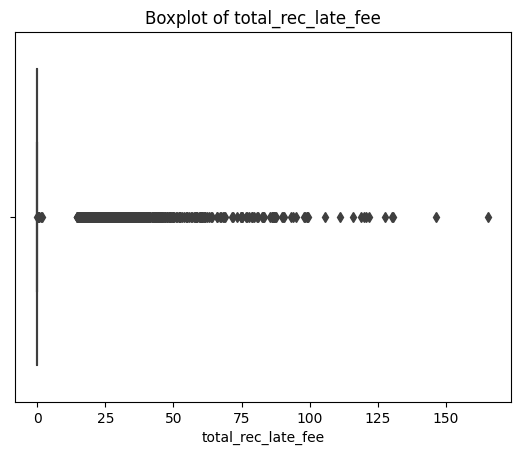

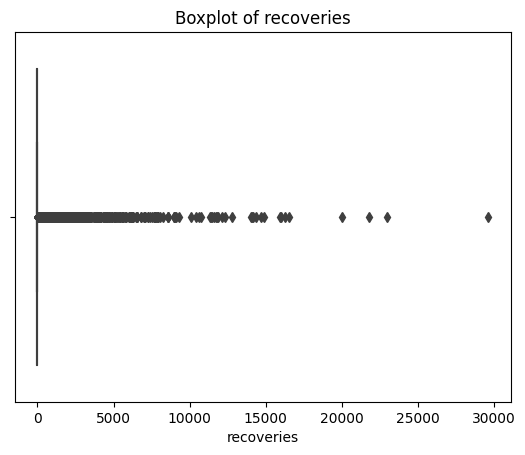

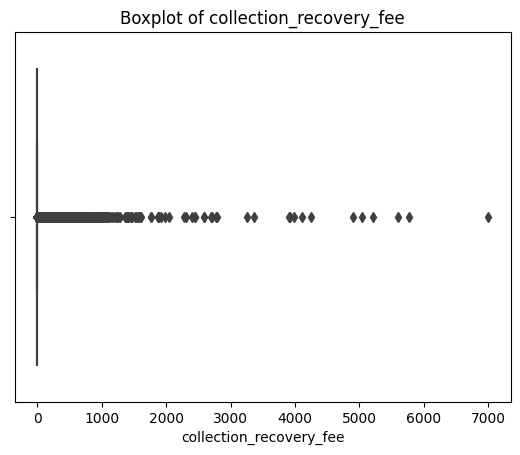

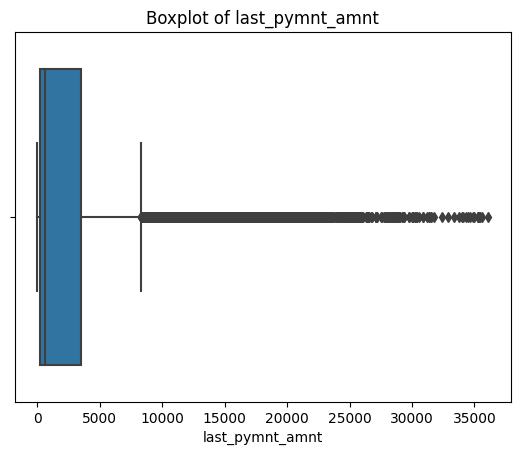

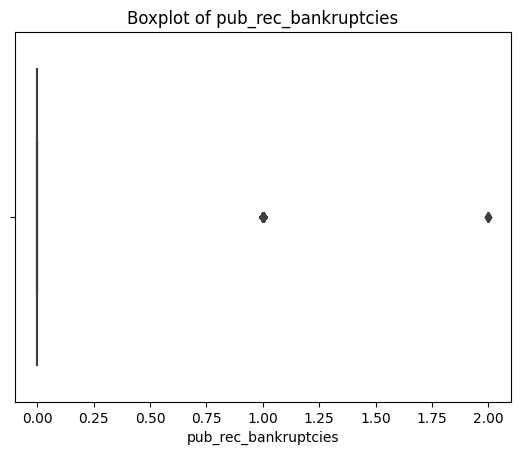

In [28]:
import pandas as pd
print(df.sample(5))  # Random samples

# Detect outliers in numeric features using boxplots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


### 5. Pie Chart for loan status distribution

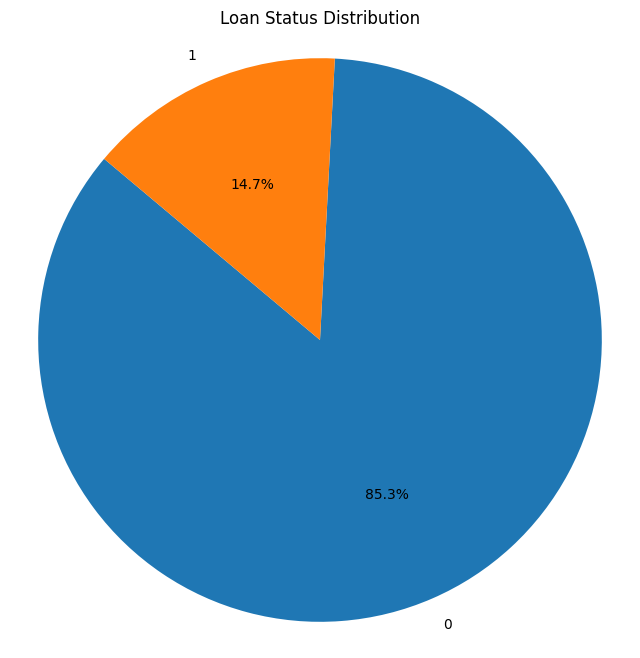

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
loan_status_counts = df['loan_status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()

### 6. Use a Baseline Model (e.g., ZeroR)
* ZeroR is a rule-based model that predicts the most frequent class (classification)

In [30]:
# The warnings occur because some classes in your target variable loan_status are not being predicted at all by your dummy classifiers, 
# making precision and F-score metrics undefined for those classes.

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
target='loan_status'

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

strategies = {
    "ZeroR (most_frequent)": DummyClassifier(strategy='most_frequent'),
    "prior": DummyClassifier(strategy='prior'),
    "uniform": DummyClassifier(strategy='uniform'),
    "constant_0": DummyClassifier(strategy='constant', constant=0),  # Change '0' as needed
}

for name, dummy in strategies.items():
    dummy.fit(X_train, y_train)
    preds = dummy.predict(X_test)
    print(f"\nStrategy: {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))


Strategy: ZeroR (most_frequent)
Accuracy: 0.8523181750851726
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      5754
           1       0.00      0.00      0.00       997

    accuracy                           0.85      6751
   macro avg       0.43      0.50      0.46      6751
weighted avg       0.73      0.85      0.78      6751


Strategy: prior
Accuracy: 0.8523181750851726
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      5754
           1       0.00      0.00      0.00       997

    accuracy                           0.85      6751
   macro avg       0.43      0.50      0.46      6751
weighted avg       0.73      0.85      0.78      6751


Strategy: uniform
Accuracy: 0.496519034217153
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.50      0.63      5754
          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

### 7. Preparing Our dataset

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df = pd.read_csv('/kaggle/input/d/mennaahmed7m/ml-dataset/loan_train.csv')

# Step 2: Separate features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Step 3: First split into train_val and test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# # Step 4: Split train_val into train and validation (87.5%-12.5% of 80% ⇒ final = 70%-10%)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val
# )

# Step 5: Recombine features and target
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
# df_val = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

# ✅ Print shapes to confirm
print("Train shape:", df_train.shape)
# print("Validation shape:", df_val.shape)
print("Test shape:", df_test.shape)

Train shape: (21602, 47)
Test shape: (5401, 47)


In [32]:
print(f"Number of rows with at least one null value: {df_train.isnull().sum()}")

Number of rows with at least one null value: id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   1328
emp_length                   580
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
url                            0
desc                        7042
purpose                        0
title                          8
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     13853
mths_since_last_record     20056
open_acc                       

In [33]:
# Step 0: Remove columns with more than 80% missing values
threshold = 0.6  # 60%
missing_ratio = df_train.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
print("Columns with more than 60% missing values:")
print(cols_to_drop.tolist())

# Step 1: Make a temporary copy
df_train_temp = df_train.copy()
df_train_temp = df_train_temp.loc[:, missing_ratio <= threshold]


# Step 2: Fill numeric NaNs with median
for col in df_train_temp.select_dtypes(include='number'):
    df_train_temp[col] = df_train_temp[col].fillna(df_train_temp[col].median())

# Step 3: Fill categorical NaNs with mode
for col in df_train_temp.select_dtypes(include=['object', 'category']):
    df_train_temp[col] = df_train_temp[col].fillna(df_train_temp[col].mode()[0])

print(f"Dataset shape: {df_train_temp.shape[0]} rows, {df_train_temp.shape[1]} columns")

Columns with more than 60% missing values:
['mths_since_last_delinq', 'mths_since_last_record']
Dataset shape: 21602 rows, 45 columns


In [34]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

def analyze_and_transform(df):
    # Function to automatically detect and apply the suitable method to each column

    def check_distribution(column):
        # Check if the data is zero-inflated (more than 50% zeros)
        zero_count = (column == 0).sum()
        zero_proportion = zero_count / len(column)
        
        # Compute skewness
        column_skew = skew(column.dropna())  # Drop NaN for skewness computation

        # Perform normality test (Shapiro-Wilk Test)
        _, p_value = shapiro(column.dropna())  # Drop NaN for the normality test

        if zero_proportion > 0.5:
            return "zero_inflated"
        elif column_skew > 0.5:
            return "right_skewed"
        elif column_skew < -0.5:
            return "left_skewed"
        elif p_value > 0.05:
            return "normally_distributed"
        else:
            return "right_skewed" if column_skew > 0 else "left_skewed"

    def apply_transformation(column, distribution_type):
        if distribution_type == "zero_inflated":
            # For zero-inflated data, we keep zero and perform log or square root transformation for non-zero values
            return np.log1p(column)  # Log(1 + X) to avoid issues with zeros
        elif distribution_type == "left_skewed" or distribution_type == "right_skewed":
            # For skewed data, apply a Box-Cox or log transformation
            # Box-Cox requires strictly positive data, so log transformation might be better for skewed data with zeros
            return np.log1p(column)  # log(1 + X) handles zeros
        elif distribution_type == "normally_distributed":
            # For normally distributed data, we standardize it (Z-score)
            return StandardScaler().fit_transform(column.values.reshape(-1, 1))
        else:
            return column  # In case something goes wrong, return the original column

    # Apply the methods for each column in the DataFrame
    for col in df.columns:
        if (df[col].dtype in [np.int64, np.float64] and col!= 'loan_status' and df[col].nunique(dropna=True) > 2 ):  # Only process numeric columns
            distribution_type = check_distribution(df[col])
            print(f"Column '{col}' is detected as {distribution_type}")
            df[col] = apply_transformation(df[col], distribution_type)
    
    return df
df_train_temp=analyze_and_transform(df_train_temp)

Column 'id' is detected as right_skewed
Column 'member_id' is detected as left_skewed
Column 'loan_amnt' is detected as right_skewed
Column 'funded_amnt' is detected as right_skewed
Column 'funded_amnt_inv' is detected as right_skewed
Column 'installment' is detected as right_skewed
Column 'annual_inc' is detected as right_skewed
Column 'dti' is detected as left_skewed
Column 'delinq_2yrs' is detected as zero_inflated
Column 'inq_last_6mths' is detected as right_skewed
Column 'open_acc' is detected as right_skewed
Column 'pub_rec' is detected as zero_inflated
Column 'revol_bal' is detected as right_skewed
Column 'total_acc' is detected as right_skewed
Column 'total_pymnt' is detected as right_skewed
Column 'total_pymnt_inv' is detected as right_skewed
Column 'total_rec_prncp' is detected as right_skewed
Column 'total_rec_int' is detected as right_skewed
Column 'total_rec_late_fee' is detected as zero_inflated
Column 'recoveries' is detected as zero_inflated
Column 'collection_recovery_

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21602.
  res = hypotest_fun_out(*samples, **kwds)


### Displaying histogram after handling left skewed, right skewed and zero-inflated columns

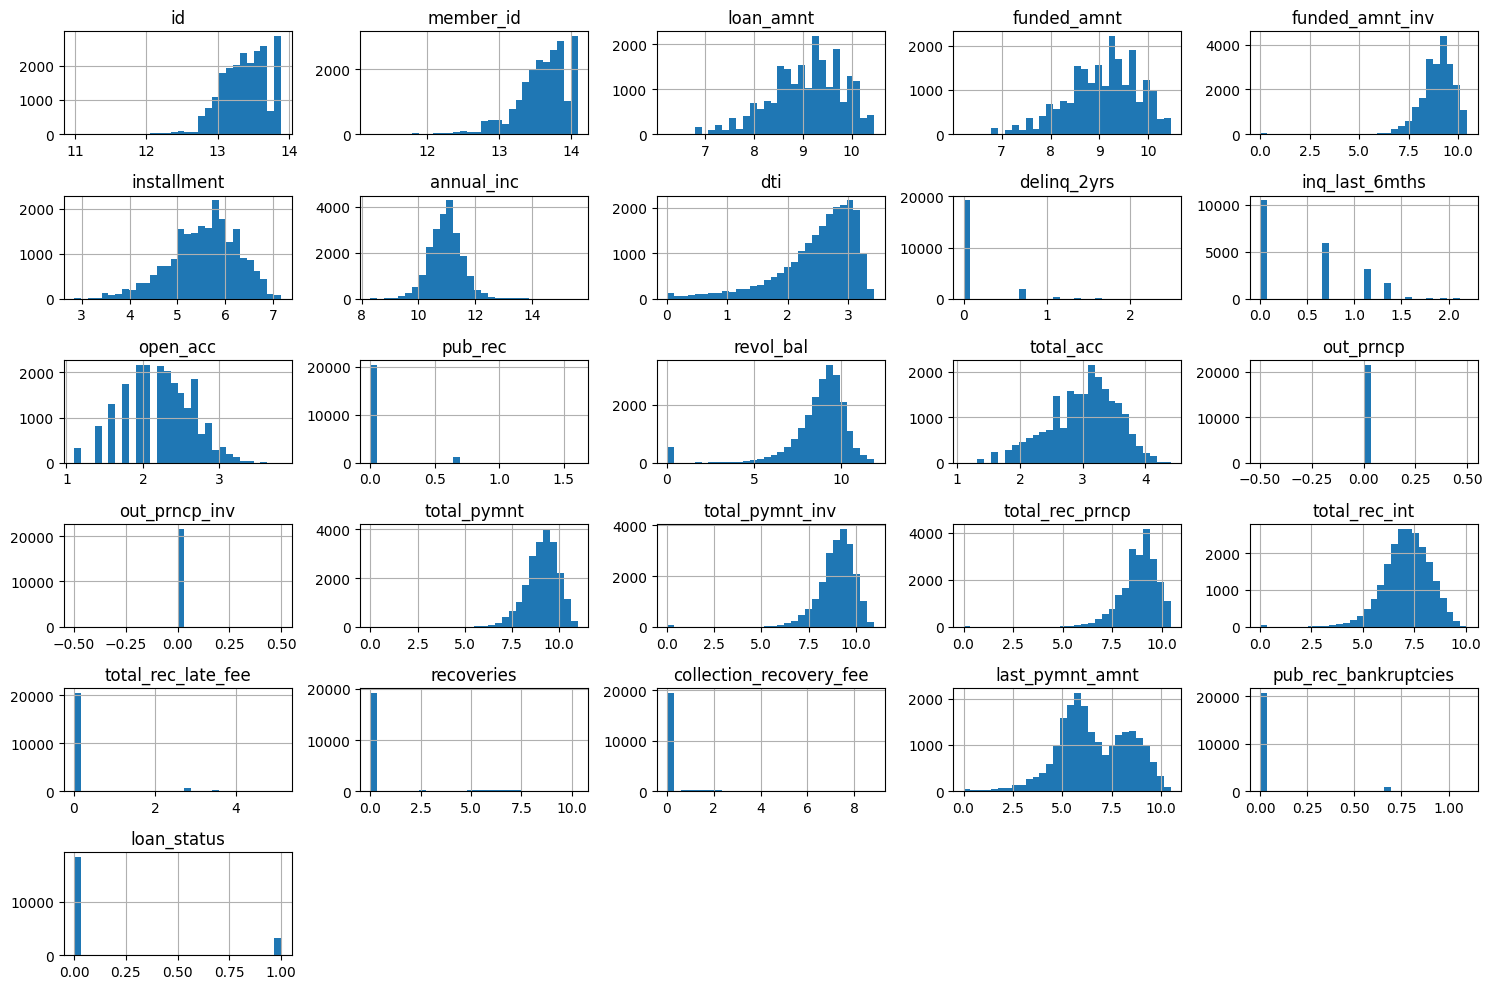

Dataset shape: 21602 rows, 45 columns


In [35]:
import matplotlib.pyplot as plt

df_train_temp.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()
print(f"Dataset shape: {df_train_temp.shape[0]} rows, {df_train_temp.shape[1]} columns")

In [36]:

# Create a copy to avoid modifying the original DataFrame
df_cleaned = df_train_temp.copy()

# Combine masks for all numeric columns
mask = pd.Series([True] * df_cleaned.shape[0], index=df_cleaned.index)

for col in numeric_cols:
    if col in df_cleaned.columns and col !='loan_status':
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Update the mask
        mask &= df_cleaned[col].between(lower_bound, upper_bound)

# Apply the mask once
df_train_temp = df_cleaned[mask]

print(f"Dataset shape: {df_train_temp.shape[0]} rows, {df_train_temp.shape[1]} columns")

Dataset shape: 13287 rows, 45 columns


### Pie Chart for loan status distribution

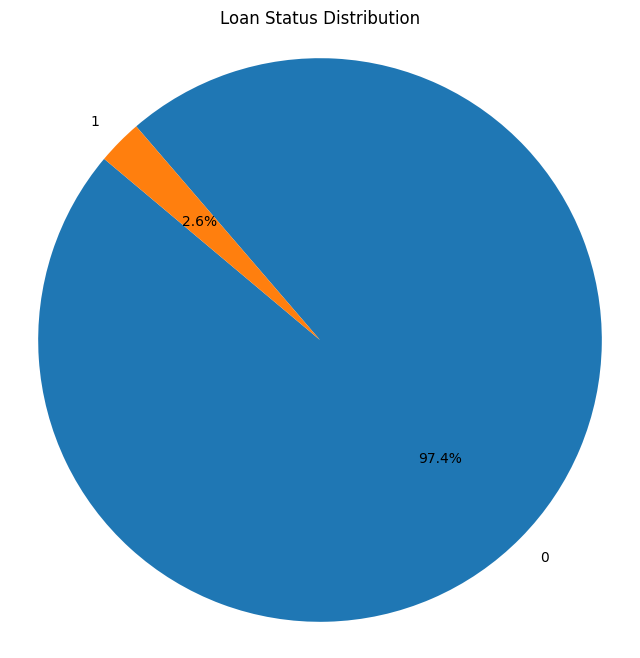

True
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'loan_status']


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
loan_status_counts = df_train_temp['loan_status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()
print('loan_status' in df_train_temp.columns)  # Check if it exists
print(df_train_temp.columns.tolist())  # Show all columns


In [38]:
# Dropping columns with high cardniality
cat_cols = df_train_temp.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"{col}: {df_train_temp[col].nunique()} unique values")
high_card_cols = [col for col in cat_cols if df_train_temp[col].nunique() > 100]
print("Dropping these high-cardinality columns:", high_card_cols)

df_train_temp = df_train_temp.drop(columns=high_card_cols)

# Step 4: One-hot encode only categorical columns with possible cardinality
categorical_cols = df_train_temp.select_dtypes(include=['object', 'category']).columns
df_train_temp = pd.get_dummies(df_train_temp, columns=categorical_cols, drop_first=True)
df_train_temp.head()

term: 2 unique values
int_rate: 272 unique values
grade: 7 unique values
sub_grade: 35 unique values
emp_title: 10668 unique values
emp_length: 11 unique values
home_ownership: 4 unique values
verification_status: 3 unique values
issue_d: 44 unique values
url: 13287 unique values
desc: 8781 unique values
purpose: 14 unique values
title: 7170 unique values
zip_code: 728 unique values
addr_state: 45 unique values
earliest_cr_line: 479 unique values
revol_util: 1004 unique values
last_pymnt_d: 89 unique values
last_credit_pull_d: 86 unique values
Dropping these high-cardinality columns: ['int_rate', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'earliest_cr_line', 'revol_util']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,last_credit_pull_d_Oct-12,last_credit_pull_d_Oct-13,last_credit_pull_d_Oct-14,last_credit_pull_d_Oct-15,last_credit_pull_d_Sep-10,last_credit_pull_d_Sep-11,last_credit_pull_d_Sep-12,last_credit_pull_d_Sep-13,last_credit_pull_d_Sep-14,last_credit_pull_d_Sep-15
0,13.502100,13.739679,9.392745,9.392745,9.392745,6.031790,11.695255,2.559550,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,13.642386,13.865768,9.798183,9.798183,9.798183,6.416324,11.512935,2.964757,0.0,0.693147,...,False,False,False,False,False,False,False,False,False,False
4,13.316034,13.565114,9.680406,9.289706,9.289706,5.370126,11.643962,3.063858,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
5,13.839348,14.041238,8.699681,8.699681,8.699681,5.254992,11.695255,2.583243,0.0,1.386294,...,False,False,False,False,False,False,False,False,False,False
6,13.497842,13.735811,9.259226,9.259226,9.259226,5.571203,10.250963,2.712706,0.0,1.098612,...,False,False,False,False,False,False,False,False,False,False


In [39]:
print(len(df_train_temp.columns))
print(df_train_temp['out_prncp'].isnull().sum())
print(df_train_temp['out_prncp'].nunique()) # 1 all the values in this column are the same.
print(df_train_temp['out_prncp_inv'].isnull().sum())
print(df_train_temp['out_prncp_inv'].nunique()) # 1 all the values in this column are the same.
# its variance is zero --> then correlation is NAN

355
0
1
0
1


In [40]:

# Step 5: Calculate correlation
# Remove columns with std=0 --> as correlation will be NAN
print(df_train_temp.columns)
cols_to_keep = (df_train_temp.std() != 0) | (df_train_temp.columns == 'loan_status')
df_train_temp = df_train_temp.loc[:, cols_to_keep]
# You have NaN correlations for: 
# That means these columns have all null values or constant values (like all zeros), which causes correlation to fail.
correlation = df_train_temp.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)
print(correlation)
print(len(df_train_temp.columns))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       ...
       'last_credit_pull_d_Oct-12', 'last_credit_pull_d_Oct-13',
       'last_credit_pull_d_Oct-14', 'last_credit_pull_d_Oct-15',
       'last_credit_pull_d_Sep-10', 'last_credit_pull_d_Sep-11',
       'last_credit_pull_d_Sep-12', 'last_credit_pull_d_Sep-13',
       'last_credit_pull_d_Sep-14', 'last_credit_pull_d_Sep-15'],
      dtype='object', length=355)
loan_status                  1.000000
last_credit_pull_d_May-16    0.199000
term_ 60 months              0.062228
last_pymnt_d_Mar-10          0.060986
last_pymnt_d_Sep-10          0.055425
                               ...   
last_credit_pull_d_Mar-16   -0.030618
last_pymnt_amnt             -0.151709
total_pymnt                 -0.180528
total_pymnt_inv             -0.192611
total_rec_prncp             -0.242254
Name: loan_status, Length: 347, dtype: float64
347


In [41]:
import numpy as np  # add this at the top
# Step 2: Thresholds
corr_threshold = 0.1
nan_threshold = 0.3
inter_corr_threshold = 0.9

# Step 3: Filter features based on correlation with target
corr_filtered = correlation[abs(correlation) >= corr_threshold]
final_cols = corr_filtered.index.tolist()

# Step 4: Drop target if still there
if 'loan_status' in final_cols:
    final_cols.remove('loan_status')

# Step 6: Remove highly correlated features with each other
# Compute inter-feature correlation
inter_corr_matrix = df_train_temp[final_cols].corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = inter_corr_matrix.where(
~np.tril(np.ones(inter_corr_matrix.shape)).astype(bool)
)

# Drop columns with high correlation
to_drop = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > inter_corr_threshold)
]

# Final features
final_cols = [col for col in final_cols if col not in to_drop]

# Step 7: Final DataFrame
df_selected = df_train_temp[final_cols + ['loan_status']]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13287 entries, 0 to 21601
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_credit_pull_d_May-16  13287 non-null  bool   
 1   last_pymnt_amnt            13287 non-null  float64
 2   total_pymnt                13287 non-null  float64
 3   loan_status                13287 non-null  int64  
dtypes: bool(1), float64(2), int64(1)
memory usage: 428.2 KB


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [42]:
print(f"Dataset shape: {df_selected.shape[0]} rows, {df_selected.shape[1]} columns")
print(f"Number of rows with at least one null value: {df_selected.isnull().sum()}")

Dataset shape: 13287 rows, 4 columns
Number of rows with at least one null value: last_credit_pull_d_May-16    0
last_pymnt_amnt              0
total_pymnt                  0
loan_status                  0
dtype: int64


In [43]:
from sklearn.preprocessing import StandardScaler
def preprocess_data(df, scaler=None, fit_scaler=False):
    # df.info()
    df = df.drop_duplicates()

    # Fill numeric NaNs
    for col in df.select_dtypes(include='number'):
        df[col] = df[col].fillna(df[col].median())
        
    # Fill categorical NaNs
    for col in df.select_dtypes(include=['object', 'category']):
        df[col] = df[col].fillna(df[col].mode()[0])

    # One-hot encode
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    df = df[final_cols + ['loan_status']]
    
    # # Standardize numeric columns
    # num_cols = df.select_dtypes(include='number').columns.drop('loan_status')
    # if fit_scaler:
    #     scaler = StandardScaler()
    #     df[num_cols] = scaler.fit_transform(df[num_cols])
    # else:
    #     df[num_cols] = scaler.transform(df[num_cols])

    # Convert all boolean columns to numeric (0 and 1)
    df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

    df.info()
    return df, scaler

In [44]:
df_train_preprocessed, scaler=preprocess_data(df_train, fit_scaler=True)
# df_val_preprocessed, _ =preprocess_data(df_val, scaler)
df_test_preprocessed, _ =preprocess_data(df_test, scaler)
# Separate features (X) and target (y) for each dataset
X_train = df_train_preprocessed.drop('loan_status', axis=1)
y_train = df_train_preprocessed['loan_status']

# X_val = df_val_preprocessed.drop('loan_status', axis=1)
# y_val = df_val_preprocessed['loan_status']
X_test = df_test_preprocessed.drop('loan_status', axis=1)
y_test = df_test_preprocessed['loan_status']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_credit_pull_d_May-16  21602 non-null  int64  
 1   last_pymnt_amnt            21602 non-null  float64
 2   total_pymnt                21602 non-null  float64
 3   loan_status                21602 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 675.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5401 entries, 0 to 5400
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_credit_pull_d_May-16  5401 non-null   int64  
 1   last_pymnt_amnt            5401 non-null   float64
 2   total_pymnt                5401 non-null   float64
 3   loan_status                5401 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 168.9 KB


### helpers

In [45]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import validation_curve, cross_validate

def get_bias_variance(estimator, X_train, y_train, X_test, y_test):
    # Fit the model
    estimator.fit(X_train, y_train)
    
    # Calculate bias and variance
    mse, bias, var = bias_variance_decomp(
        estimator, 
        X_train=X_train, 
        y_train=y_train, 
        X_test=X_test, 
        y_test=y_test, 
        loss='0-1_loss',  # For classification
        random_seed=42
    )
    
    print(f"\nBias-Variance Analysis:")
    print(f"● mean square error: {mse:.7f}")
    print(f"● bias: {bias:.7f}")
    print(f"● var: {var:.7f}")
    print(f"● Estimated Eout: {mse:.7f}")
    
    return mse, bias, var

In [46]:
def plot_with_fill_between(x, train_scores, val_scores, xlabel, title, log_scale=False,y_padding=0.15):
    """Helper function to plot with fill_between"""
    # np.mean(..., axis=1) averages scores across cross-validation folds
    # semilogx uses log scale for x-axis (appropriate for C parameter)
    train_mean = np.mean(train_scores, axis=1) if train_scores.ndim > 1 else train_scores
    train_std = np.std(train_scores, axis=1) if train_scores.ndim > 1 else 0
    val_mean = np.mean(val_scores, axis=1) if val_scores.ndim > 1 else val_scores
    val_std = np.std(val_scores, axis=1) if val_scores.ndim > 1 else 0
    
    plt.figure(figsize=(8, 5))
    if log_scale:
        plt.semilogx(x, train_mean, 'o-', color="blue", label="Training score")
        plt.semilogx(x, val_mean, 'o-', color="red", label="Validation score")
    else:
        plt.plot(x, train_mean, 'o-', color="blue", label="Training score")
        plt.plot(x, val_mean, 'o-', color="red", label="Validation score")
    
    plt.fill_between(x, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
    plt.fill_between(x, val_mean - val_std, val_mean + val_std, alpha=0.2, color="red")

    # Calculate dynamic y-axis limits with padding
    y_min = min(np.min(train_mean - train_std), np.min(val_mean - val_std)) - y_padding
    y_max = max(np.max(train_mean + train_std), np.max(val_mean + val_std)) + y_padding
    plt.ylim(max(0, y_min), min(1.0, y_max))  # Keep between 0 and 1 for accuracy
    
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    plt.title(title, pad=20)
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()


## Trial 3: Logistic Regression

### Hyperparameter tuning

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import make_scorer, f1_score


f1_scorer = make_scorer(f1_score, average='weighted')
# Suppress convergence warnings 
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Step 2: Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # these solvers support both l1 and l2
}


# Step 3: Grid Search
# # Auto-adjusts weights inversely proportional to class frequencies
logreg = LogisticRegression(max_iter=10000,)
grid = GridSearchCV(logreg, param_grid, cv=3, scoring=f1_scorer, n_jobs=-1)
grid.fit(X_train, y_train)

# Step 4: Convert results to DataFrame
results = pd.DataFrame(grid.cv_results_)

# Optional: Best result
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Step 5: Evaluate best model on test set
best_model = grid.best_estimator_
y_test_preds = best_model.predict(X_test)

# Step 6: Metrics
test_accuracy = accuracy_score(y_test, y_test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_preds))

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.800541913804102
Test Accuracy: 0.8567
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4606
           1       0.70      0.05      0.09       795

    accuracy                           0.86      5401
   macro avg       0.78      0.52      0.50      5401
weighted avg       0.83      0.86      0.80      5401



In [49]:
get_bias_variance(best_model, X_train.values , y_train.values , X_test.values , y_test.values )


Bias-Variance Analysis:
● mean square error: 0.1436660
● bias: 0.1434919
● var: 0.0031661
● Estimated Eout: 0.1436660


(0.14366598778004072, 0.14349194593593778, 0.0031660803554897235)

### Heatmaps between hyperparameters

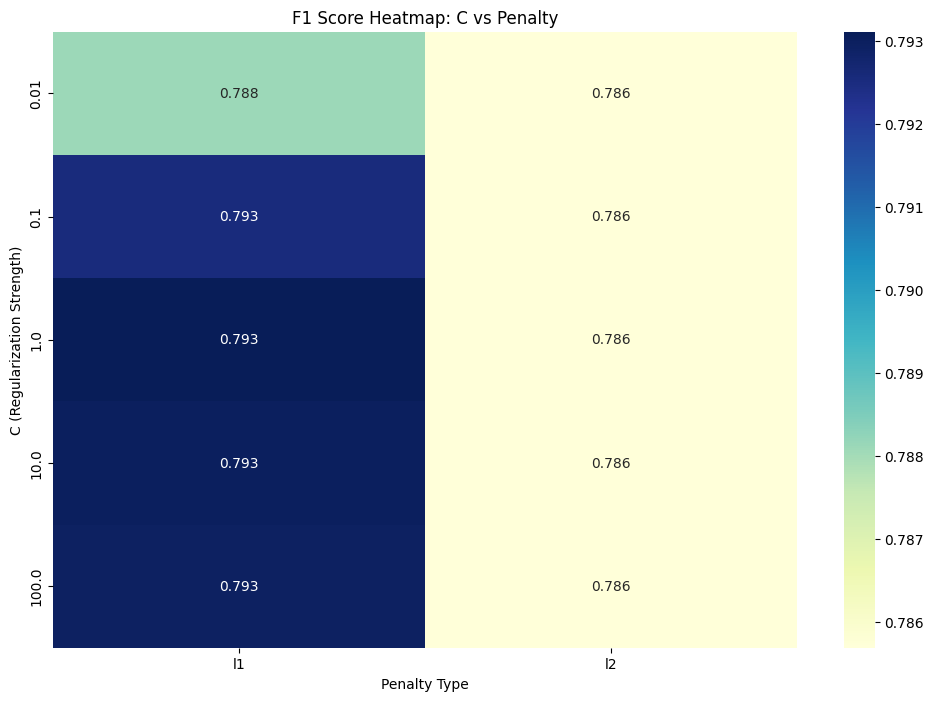

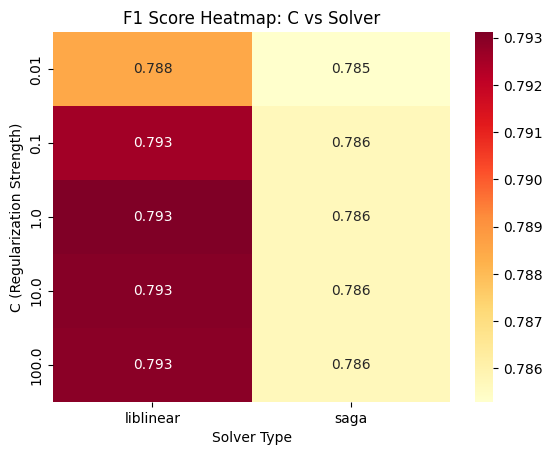

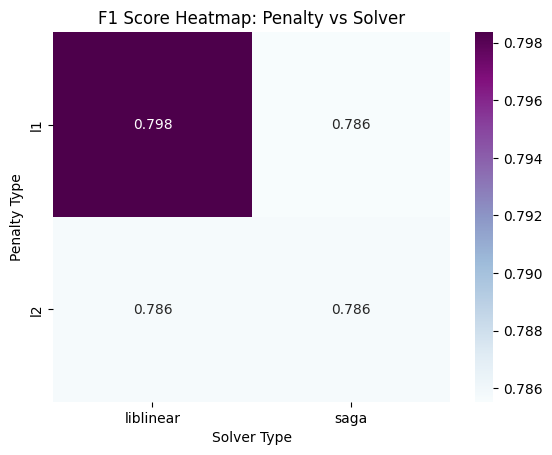

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract parameters into separate columns for easier pivoting
params_df = pd.DataFrame(results['params'].tolist())
results = pd.concat([results, params_df], axis=1)

# Now create the heatmaps
plt.figure(figsize=(12, 8))

# Heatmap 1: C vs Penalty
try:
    heatmap1 = results.pivot_table(index='param_C', columns='param_penalty', values='mean_test_score')
    sns.heatmap(heatmap1, annot=True, cmap='YlGnBu', fmt=".3f")
    plt.title("F1 Score Heatmap: C vs Penalty")
    plt.ylabel("C (Regularization Strength)")
    plt.xlabel("Penalty Type")
    plt.show()
except KeyError as e:
    print(f"Could not create C vs Penalty heatmap: {e}")

# Heatmap 2: C vs Solver
try:
    heatmap2 = results.pivot_table(index='param_C', columns='param_solver', values='mean_test_score')
    sns.heatmap(heatmap2, annot=True, cmap='YlOrRd', fmt=".3f")
    plt.title("F1 Score Heatmap: C vs Solver")
    plt.ylabel("C (Regularization Strength)")
    plt.xlabel("Solver Type")
    plt.show()
except KeyError as e:
    print(f"Could not create C vs Solver heatmap: {e}")

# Heatmap 3: Penalty vs Solver
try:
    heatmap3 = results.pivot_table(index='param_penalty', columns='param_solver', values='mean_test_score')
    sns.heatmap(heatmap3, annot=True, cmap='BuPu', fmt=".3f")
    plt.title("F1 Score Heatmap: Penalty vs Solver")
    plt.ylabel("Penalty Type")
    plt.xlabel("Solver Type")
    plt.show()
except KeyError as e:
    print(f"Could not create Penalty vs Solver heatmap: {e}")

### Plot Ein and Eval vs. Training Set Size

Size 0.1: Train Error=0.1354, Val Error=0.1446
Size 0.2: Train Error=0.1354, Val Error=0.1349
Size 0.3: Train Error=0.1395, Val Error=0.1382
Size 0.4: Train Error=0.1451, Val Error=0.1402
Size 0.5: Train Error=0.1463, Val Error=0.1435
Size 0.6: Train Error=0.1465, Val Error=0.1446
Size 0.7: Train Error=0.1472, Val Error=0.1444
Size 0.8: Train Error=0.1447, Val Error=0.1396
Size 0.9: Train Error=0.1443, Val Error=0.1416
Size 1.0: Train Error=0.1452, Val Error=0.1405


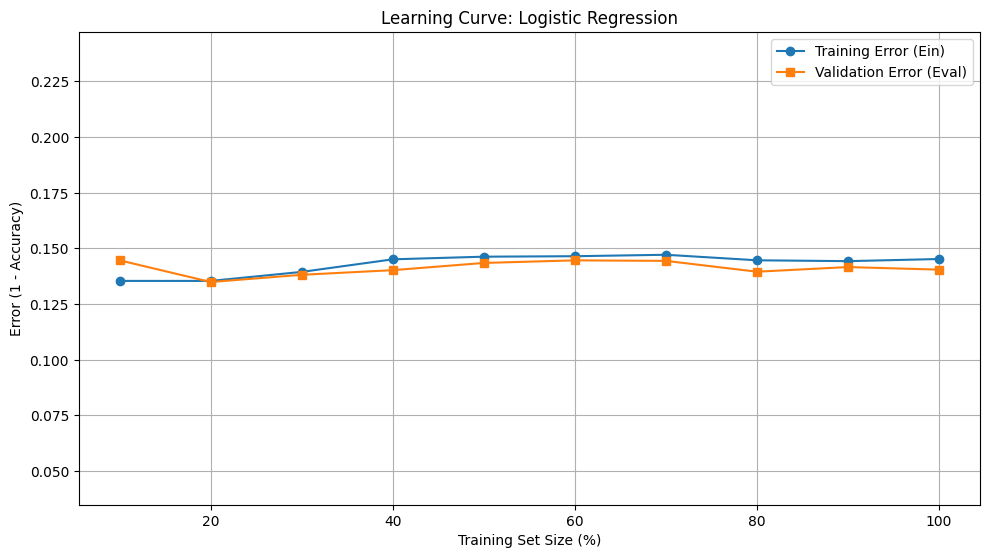

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Store errors
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 equally spaced values between 0.1 and 1.0
ein_list = []
eval_list = []

# Split original training data into training + validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)
# Shuffle training data
X_train_sub = X_train_sub.sample(frac=1, random_state=42)
y_train_sub = y_train_sub.sample(frac=1, random_state=42)

for size in train_sizes:
    # Sample subset
    subset_len = int(len(X_train_sub) * size)
    X_sub = X_train_sub[:subset_len]
    y_sub = y_train_sub[:subset_len]

    # Train model
    model = LogisticRegression(penalty='l2', solver='lbfgs', C=1, max_iter=1000)
    model.fit(X_sub, y_sub)

    # Training error (Ein)
    y_train_pred = model.predict(X_sub)
    ein = 1 - accuracy_score(y_sub, y_train_pred)
    ein_list.append(ein)

    # Validation error (Eval)
    y_val_pred = model.predict(X_val)
    eval_ = 1 - accuracy_score(y_val, y_val_pred)
    eval_list.append(eval_)
    
    print(f"Size {size:.1f}: Train Error={ein:.4f}, Val Error={eval_:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, ein_list, marker='o', label='Training Error (Ein)')
plt.plot(train_sizes * 100, eval_list, marker='s', label='Validation Error (Eval)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Learning Curve: Logistic Regression')
plt.legend()
# Calculate dynamic y-axis limits
y_min = min(min(ein_list), min(eval_list)) - 0.1  # 5% padding below
y_max = max(max(ein_list), max(eval_list)) + 0.1  # 5% padding above
plt.ylim(max(0, y_min), min(1.0, y_max))  # Keep between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

### Bias-Variance Tradeoff plot

/tmp/ipykernel_31/503329604.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


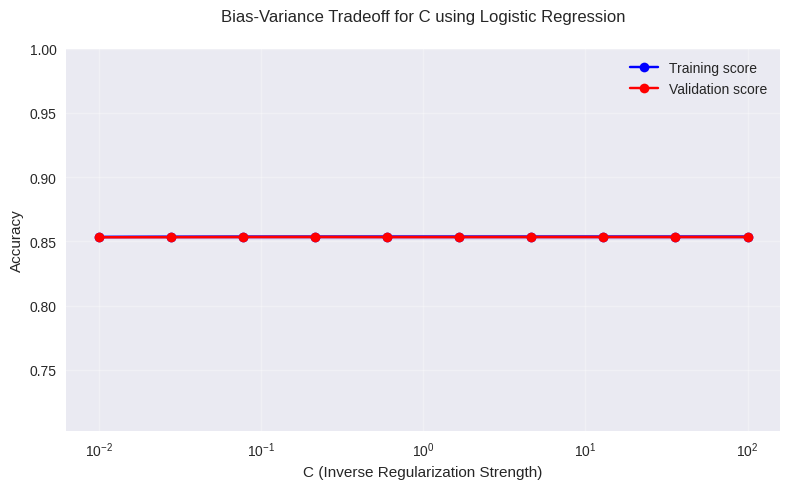

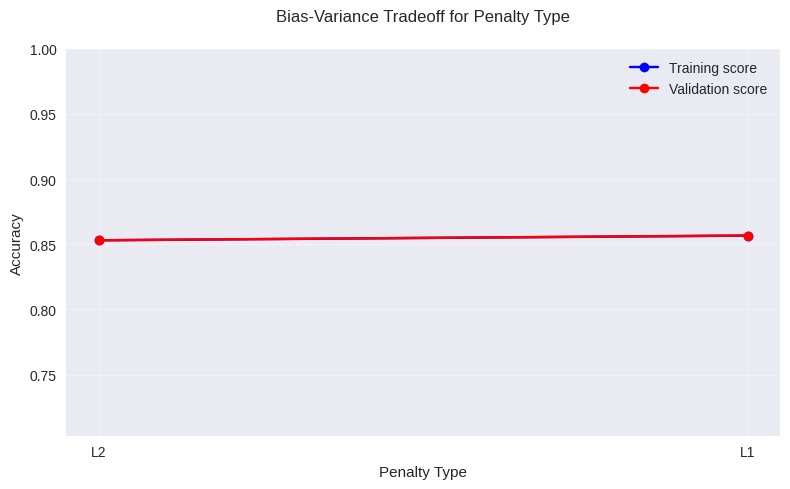

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


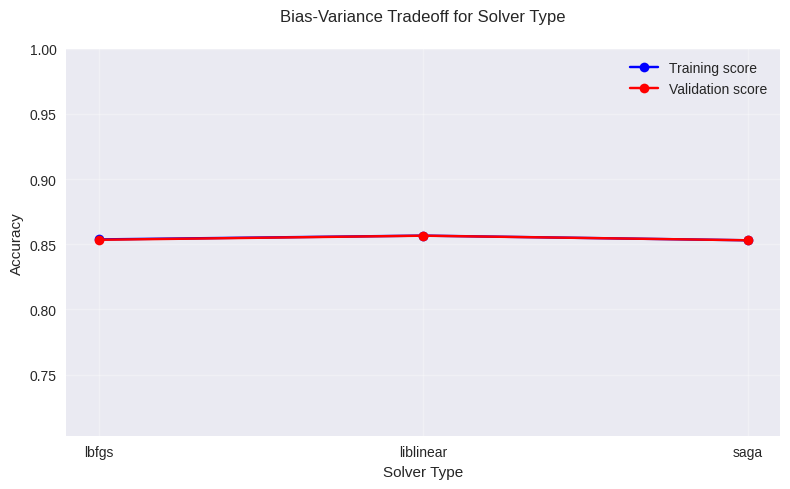

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve, cross_validate

# Split data into train and validation sets
X_train_copy= X_train.copy()
y_train_copy=y_train.copy()

plt.style.use('seaborn')

#**** 1. Validation Curve for C Parameter (Log Scale) ****
param_range = np.logspace(-2, 2, 10)
train_scores, val_scores = validation_curve(
    LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs'),
    X_train_copy, y_train_copy,
    param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)
plot_with_fill_between(param_range, train_scores, val_scores, 
                      "C (Inverse Regularization Strength)", 
                      "Bias-Variance Tradeoff for C using Logistic Regression",
                      log_scale=True)
plt.show()

#**** 2. Validation Curve for Penalty Type ****
penalties = ['l2', 'l1']
train_scores, val_scores = [], []

# For each penalty type:
    # Creates a model with specified penalty and solver ('liblinear' supports both L1/L2)
    # Performs cross-validation, returning both train
for penalty in penalties:
    model = LogisticRegression(penalty=penalty, solver='liblinear', C=1.0, max_iter=1000)
    cv_results = cross_validate(model, X_train_copy, y_train_copy, cv=5, 
                              return_train_score=True, n_jobs=-1)
    train_scores.append(np.mean(cv_results['train_score']))
    val_scores.append(np.mean(cv_results['test_score']))
    # For std, we need to calculate across folds
    train_scores.append(np.std(cv_results['train_score']))
    val_scores.append(np.std(cv_results['test_score']))

# Reshape for fill_between
train_scores = np.array(train_scores).reshape(2, 2)
val_scores = np.array(val_scores).reshape(2, 2)
plot_with_fill_between(np.arange(len(penalties)), 
                      train_scores[:, 0], val_scores[:, 0],
                      "Penalty Type", 
                      "Bias-Variance Tradeoff for Penalty Type",
                      log_scale=False)
plt.xticks(np.arange(len(penalties)), ['L2', 'L1'])
plt.show()

# **** 3. Validation Curve for Solver Type with automatic penalty selection ****
solvers = ['lbfgs', 'liblinear', 'saga']
train_scores, val_scores = [], []

for solver in solvers:
    penalty = 'l1' if solver in ['liblinear', 'saga'] else 'l2'
    model = LogisticRegression(solver=solver, penalty=penalty, C=1.0, max_iter=1000)
    cv_results = cross_validate(model, X_train_copy, y_train_copy, cv=5,
                              return_train_score=True, n_jobs=-1)
    train_scores.append(np.mean(cv_results['train_score']))
    val_scores.append(np.mean(cv_results['test_score']))
    # For std
    train_scores.append(np.std(cv_results['train_score']))
    val_scores.append(np.std(cv_results['test_score']))

# Reshape for fill_between
train_scores = np.array(train_scores).reshape(3, 2)
val_scores = np.array(val_scores).reshape(3, 2)
plot_with_fill_between(np.arange(len(solvers)), 
                      train_scores[:, 0], val_scores[:, 0],
                      "Solver Type", 
                      "Bias-Variance Tradeoff for Solver Type",
                      log_scale=False)
plt.xticks(np.arange(len(solvers)), solvers)
plt.show()